In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

In [9]:
url = 'https://raw.githubusercontent.com/RamiKrispin/coronavirus/main/csv/coronavirus_2020.csv'

In [10]:
df = pd.read_csv(url)

<ipython-input-10-7832ba498456>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


# Display basic information about the dataset

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293940 entries, 0 to 293939
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            293940 non-null  object 
 1   province        88665 non-null   object 
 2   country         293940 non-null  object 
 3   lat             292215 non-null  float64
 4   long            292215 non-null  float64
 5   type            293940 non-null  object 
 6   cases           293940 non-null  int64  
 7   uid             282900 non-null  float64
 8   iso2            278760 non-null  object 
 9   iso3            279795 non-null  object 
 10  code3           279795 non-null  float64
 11  combined_key    282900 non-null  object 
 12  population      277380 non-null  float64
 13  continent_name  279795 non-null  object 
 14  continent_code  229770 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 33.6+ MB
None


# Data Cleaning

In [12]:
df = df[['cases', 'population']]

# Handle missing values

In [13]:
df.dropna(inplace=True)

<ipython-input-13-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


# Exploratory Data Analysis

# Scatter plot to visualize relationship

In [14]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='population', ylabel='cases'>

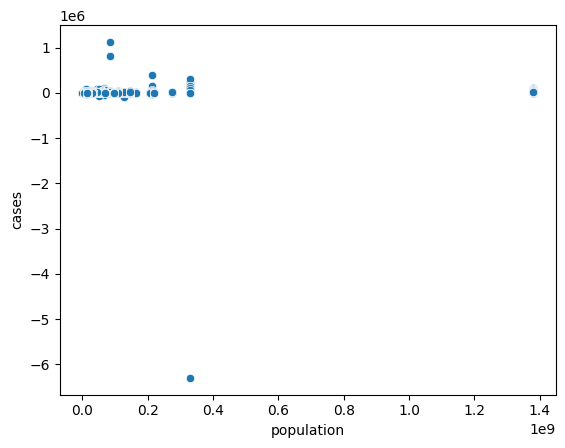

In [15]:
sns.scatterplot(x='population', y='cases', data=df)

Text(0.5, 1.0, 'Scatter Plot: Population vs. Cases')

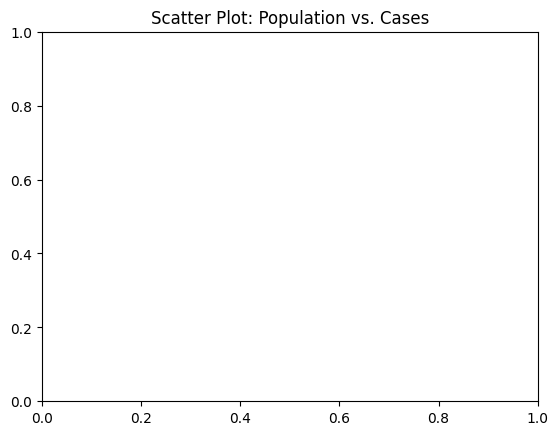

In [16]:
plt.title('Scatter Plot: Population vs. Cases')

Text(0.5, 0, 'Population')

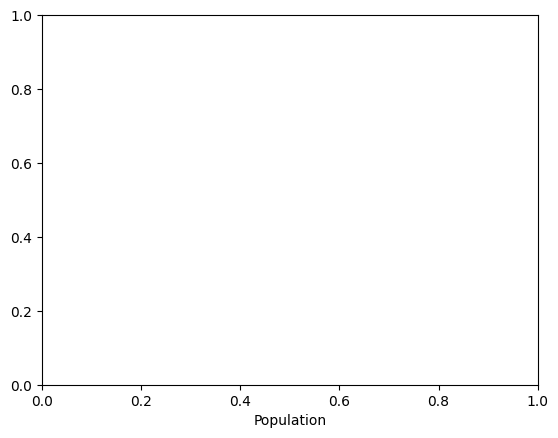

In [17]:
plt.xlabel('Population')

Text(0, 0.5, 'Cases')

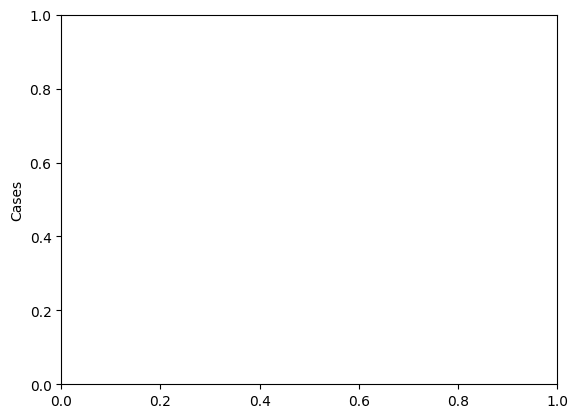

In [18]:
plt.ylabel('Cases')

In [19]:
plt.show()

# Correlation matrix

In [20]:
corr = df.corr()

In [21]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Axes: >

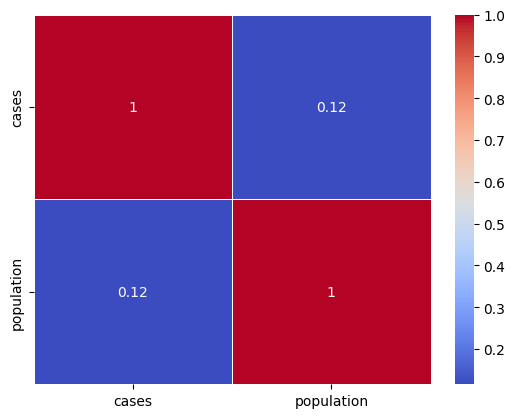

In [22]:
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

Text(0.5, 1.0, 'Correlation Matrix')

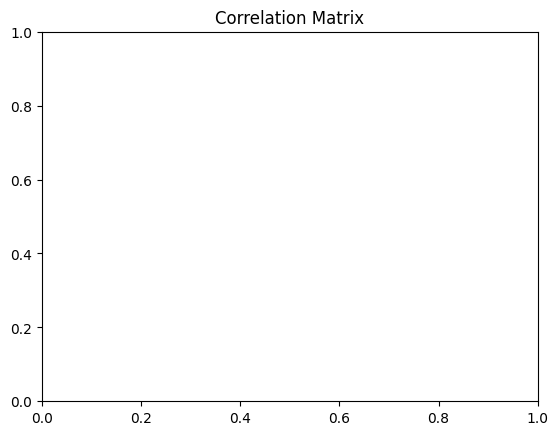

In [23]:
plt.title('Correlation Matrix')

In [24]:
plt.show()

# Splitting the Data

In [25]:
X = df[['population']]

In [26]:
y = df['cases']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

# Making Predictions

In [30]:
y_pred = model.predict(X_test)

# Model Evaluation

In [31]:
mse = mean_squared_error(y_test, y_pred)

In [32]:
r2 = r2_score(y_test, y_pred)

In [33]:
print('Mean Squared Error:', mse)

Mean Squared Error: 16290243.469826922


In [34]:
print('R-squared:', r2)

R-squared: 0.13440717837173333


# Visualizing the Regression Line

In [35]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

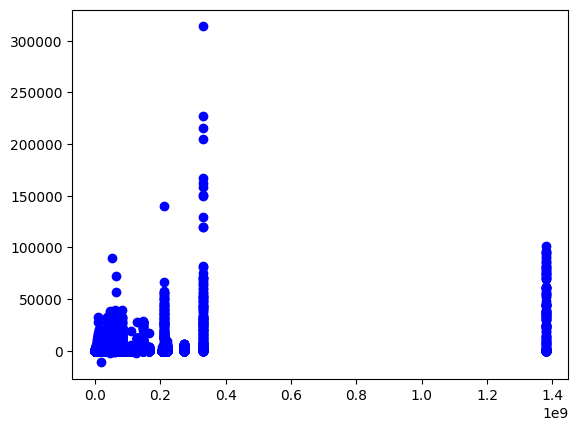

In [36]:
plt.scatter(X_test, y_test, color='blue', label='Actual')

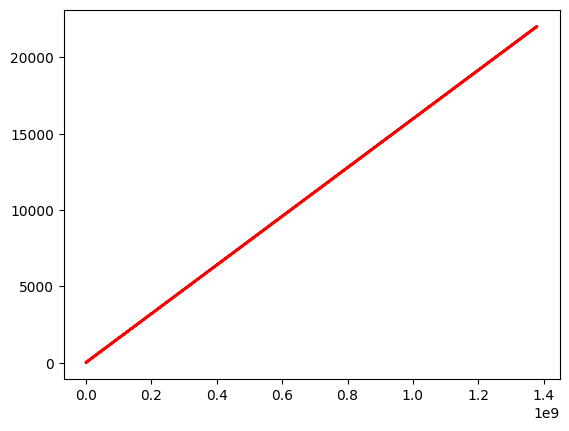

In [37]:
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')

Text(0.5, 0, 'Population')

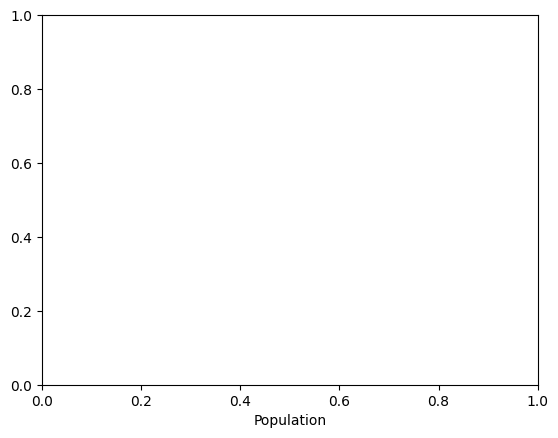

In [38]:
plt.xlabel('Population')

Text(0, 0.5, 'Cases')

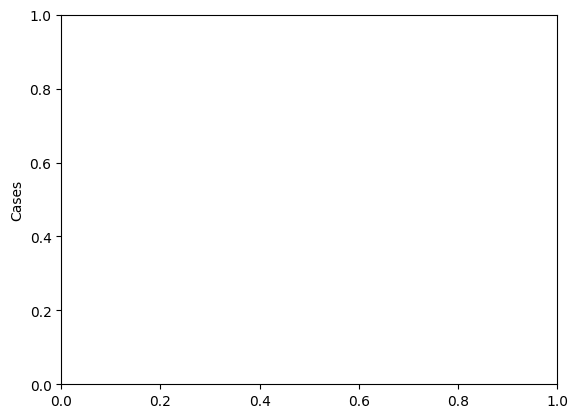

In [39]:
plt.ylabel('Cases')

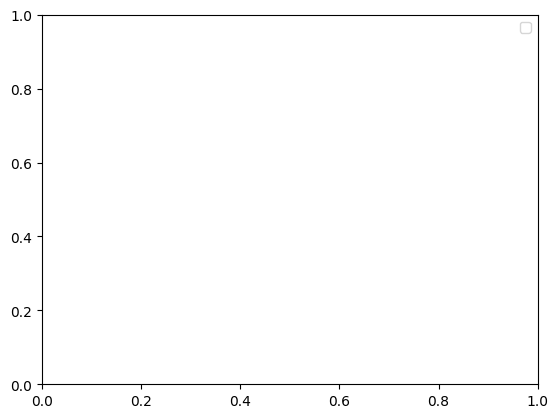

In [40]:
plt.legend()

Text(0.5, 1.0, 'Linear Regression: Population vs. Cases')

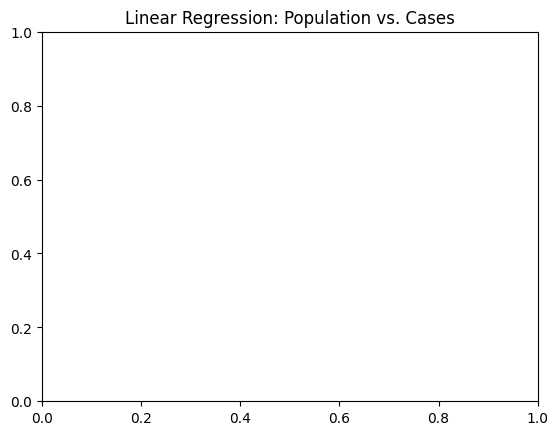

In [41]:
plt.title('Linear Regression: Population vs. Cases')

In [42]:
plt.show()

# Visualizing Actual vs. Predicted Values

In [43]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

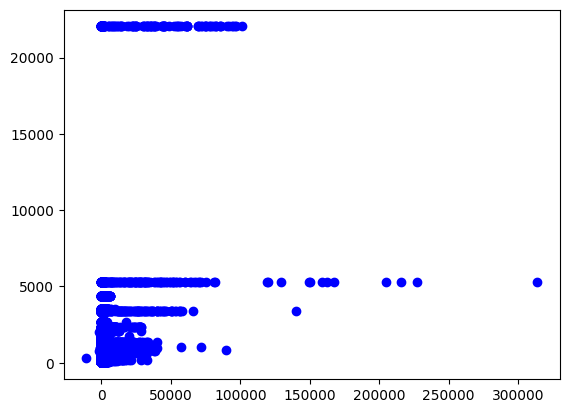

In [44]:
plt.scatter(y_test, y_pred, color='blue')

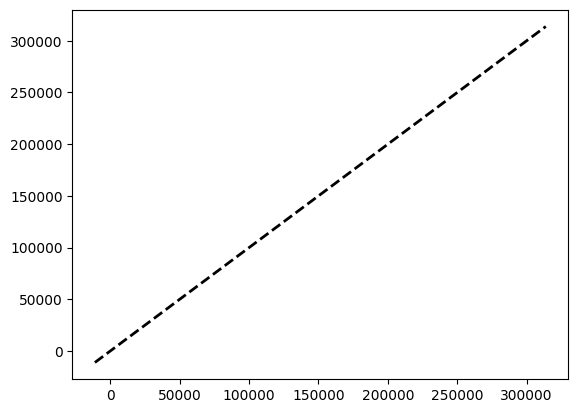

In [45]:
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

Text(0.5, 0, 'Actual Cases')

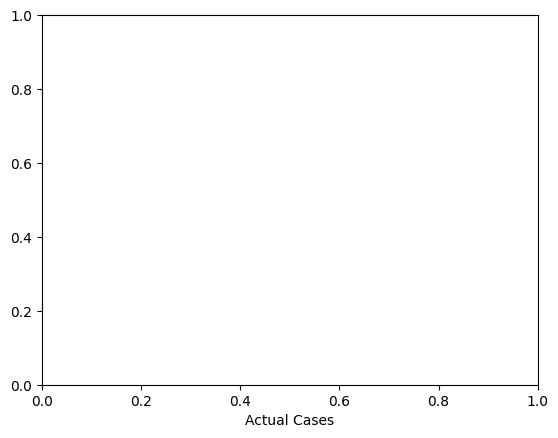

In [46]:
plt.xlabel('Actual Cases')

Text(0, 0.5, 'Predicted Cases')

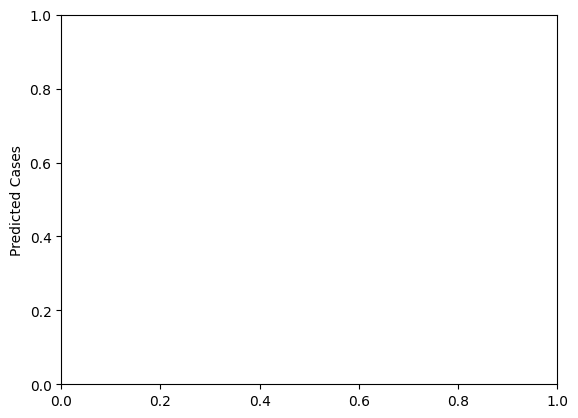

In [47]:
plt.ylabel('Predicted Cases')

Text(0.5, 1.0, 'Actual vs. Predicted Cases')

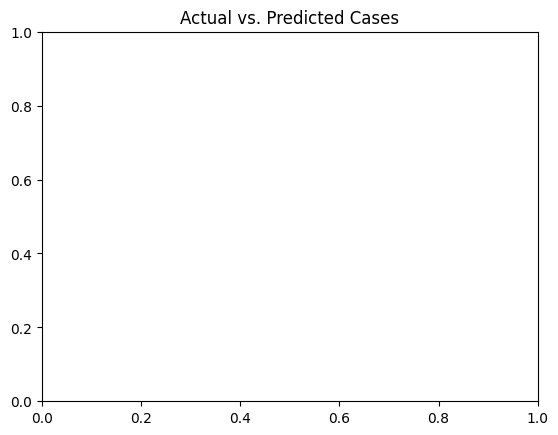

In [48]:
plt.title('Actual vs. Predicted Cases')

In [49]:
plt.show()